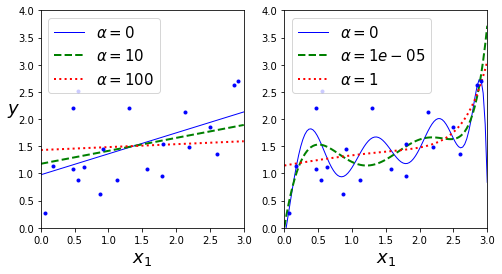

In [3]:
# 관련 라이브러리
from sklearn.linear_model import Ridge
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

## Ridge를 통해 가중치 구하기
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)
def plot_model(model_class, polynomial, alphas, **model_kargs):
 for alpha, style in zip(alphas, ("b-", "g--", "r:")):
  model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
  if polynomial:
    model = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("std_scaler", StandardScaler()),
    ("regul_reg", model),
    ])
  model.fit(X, y)
  y_new_regul = model.predict(X_new)
  lw = 2 if alpha > 0 else 1  # if -> Ridge로 학습, else -> sklearn의 선형회귀 모델을 사용하여 학습
  plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
 plt.plot(X, y, "b.", linewidth=3)
 plt.legend(loc="upper left", fontsize=15)
 plt.xlabel("$x_1$", fontsize=18)
 plt.axis([0, 3, 0, 4])
plt.figure(figsize=(8,4))
plt.subplot(121)
# Ridge의 기본 데이터셋으로 학습
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
# Ridge의 확장된 데이터셋으로 학습
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)
plt.show()
# 화면 출력 확인 및 결과 해석
## 오버피팅을 방지하기 위해 모델을 규제
## alpha값으로 모델의 규제 정도를 결정, alpha값이 커지면 선형회귀에서는 기울기가 감소하지만 다항회귀에서는 그래프가 단순해짐
## 따라서 훈련 집합에 덜 영향을 받는 다는 것을 알 수 있음